## Sample Neural network with one layer using Numpy
https://towardsdatascience.com/build-a-simple-neural-network-using-numpy-2add9aad6fc8https://towardsdatascience.com/build-a-simple-neural-network-using-numpy-2add9aad6fc8

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [11]:
def load_dataset():
    train_set = h5py.File('train_catvnoncat.h5','r')
    train_x = np.array(train_set['train_set_x'][:])
    train_y = np.array(train_set['train_set_y'][:])

    test_set = h5py.File('test_catvnoncat.h5','r')
    test_x = np.array(test_set['test_set_x'][:])
    test_y = np.array(test_set['test_set_y'][:])

    classes = np.array(test_set['list_classes'][:])
    train_y = train_y.reshape((1,train_y.shape[0]))
    test_y = test_y.reshape((1,test_y.shape[0]))

    return(train_x,train_y,test_x,test_y,classes)

In [12]:
train_x, train_y, test_x, test_y, classes = load_dataset()
print ("Train X shape: " + str(train_x.shape))
print ("Train Y shape: " + str(train_y.shape))
print ("Test X shape: " + str(test_x.shape))
print ("Test Y shape: " + str(test_y.shape))

Train X shape: (209, 64, 64, 3)
Train Y shape: (1, 209)
Test X shape: (50, 64, 64, 3)
Test Y shape: (1, 50)


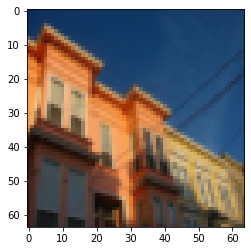

In [16]:
index = np.random.randint(0,train_y.shape[1])
plt.imshow(train_x[index])

In [17]:
# Flattening images
train_x = train_x.reshape(train_x.shape[0], -1).T 
# The -1 argument means taking train_x.shape[0] and 'flattening' all other dimensions
test_x = test_x.reshape(test_x.shape[0], -1).T

print ("Train X shape: " + str(train_x.shape))
print ("Train Y shape: " + str(train_y.shape))
print ("Test X shape: " + str(test_x.shape))
print ("Test Y shape: " + str(test_y.shape))

# Standardize data
train_x = train_x/255
train_y = train_y/255

Train X shape: (12288, 209)
Train Y shape: (1, 209)
Test X shape: (12288, 50)
Test Y shape: (1, 50)


In [29]:
# Activation function - Sigmoid
def sigmoid(x):
    return(1/(1+np.exp(-x)))

# Random initialization for weights
def initialize_parameters(dim):
    weights = np.random.randn(dim,1)*0.01
    bias = 0
    return(weights,bias)

# Forward propagation and computing losses and gradients
def propagate(w,b,X,Y):
    samples = X.shape[1]
    # Activation function for forward pass
    output = sigmoid(np.dot(w.T,X)+b)
    # Computing cost
    cost = (-1/samples)*np.sum(Y*np.log(output)+(1-Y)*np.log(1-output))
    # Computing gradients
    dw = (1/samples)*np.dot(X,(output-Y).T)
    db = (1/samples)*np.sum(output-Y)

    cost = np.squeeze(cost) # Removing single dimensional entries
    grads = {'dw':dw, 'db':db}
    return(grads,cost)

# Use gradients and backpropagate
def gradient_descent(w,b,X,Y,iterations, learning_rate):
    costs = []
    for i in range(iterations):
        grads, cost = propagate(w,b,X,Y)
        w = w - learning_rate*grads['dw']
        b = b - learning_rate*grads['db']
        costs.append(cost)
        if(i%500 == 0): print('Iteration %i - Cost: %f' %(i,cost))

    params = {'w':w,'b':b}
    return(params,costs)

# With the trained weights and bias, predict new data
def predict(w,b,X):
    samples = X.shape[1]
    # Empty output to store predicted values
    y_pred = np.zeros((1,samples))
    w = w.reshape(X.shape[0],1)

    activation = sigmoid(np.dot(w.T,X)+b)
    threshold = 0.5
    for i in range(activation.shape[1]):
        y_pred[0,i] = 1 if activation[0,i] > threshold else 0
        pass
    return(y_pred)

def model(train_x, train_y, test_x, test_y, iterations, learning_rate):
    weights, bias = initialize_parameters(train_x.shape[0])
    parameters, costs = gradient_descent(weights,bias,train_x,train_y,iterations,learning_rate)
    new_weights = parameters['w']
    new_bias = parameters['b']

    # Predict aacuracy of model
    train_pred_y = predict(weights,bias,train_x)
    test_pred_y = predict(weights,bias,test_x)

    print("Train Acc: {} %".format(100 - np.mean(np.abs(train_pred_y - train_y)) * 100))
    print("Test Acc: {} %".format(100 - np.mean(np.abs(test_pred_y - test_y)) * 100))
    return(costs)

In [40]:
costs = model(train_x,train_y,test_x,test_y,iterations = 2000, learning_rate=0.0005)
# Something wrong. Training accuracy is bad

Iteration 0 - Cost: 0.806349
Iteration 500 - Cost: 0.018181
Iteration 1000 - Cost: 0.016667
Iteration 1500 - Cost: 0.016137
Train Acc: 24.47696782062107 %
Test Acc: 52.0 %


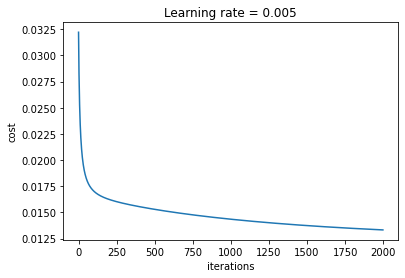

In [48]:
plt.plot(costs[1:])
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate = 0.005")
plt.show()